In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Australian Data
aus_file = pd.read_csv (r'Resources/Australian Vaccinations.txt')
aus_file.to_csv (r'Resources/Australian Vaccinations.csv', index=None)

# USA Data
usa_file = pd.read_csv (r'Resources/USA Vaccinations.txt')
usa_file.to_csv (r'Resources/USA Vaccinations.csv', index=None)

# South Korea Data
skr_file = pd.read_csv (r'Resources/South Korea Vaccinations.txt')
skr_file.to_csv (r'Resources/South Korea Vaccinations.csv', index=None)

In [2]:
# Drop columns
aus_df = aus_file[aus_file['total_vaccinations'] > 0].reset_index( drop = True)
aus_df = aus_df.drop(columns=['source_url', 'total_boosters'])

usa_df = usa_file[usa_file['total_vaccinations'] > 0].reset_index( drop = True)
usa_df = usa_df.drop(columns=['source_url', 'total_boosters'])

skr_df = skr_file[skr_file['total_vaccinations'] > 0].reset_index( drop = True)
skr_df = skr_df.drop(columns=['source_url', 'total_boosters'])

In [3]:
# Second Australian Data for partial/full vaccination data
aus_df2 = aus_df[aus_df['people_fully_vaccinated'] > 0].reset_index(drop = True)
aus_df2

,date,total_vaccinations,people_fully_vaccinated,people_vaccinated,vaccine,location
0,2021-05-24,3613053,416293.0,3196760.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Australia
1,2021-05-25,3690622,419237.0,3271385.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Australia
2,2021-05-26,3795280,472882.0,3322398.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Australia
3,2021-05-27,3906668,481681.0,3424987.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Australia
4,2021-05-28,4031539,491319.0,3540220.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Australia
...,...,...,...,...,...,...
105,2021-09-13,22802573,8711193.0,14091380.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Australia
106,2021-09-14,23078749,8852319.0,14226430.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Australia
107,2021-09-15,23362740,8995310.0,14367430.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Australia
108,2021-09-16,23751922,9142725.0,14609197.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Australia


In [4]:
# Merge Aus and US data
merged_df = aus_df.merge(usa_df, how = 'inner', on='date', suffixes = ('_aus','_us'))

# Remove unused columns
merged_df = merged_df.drop(columns=['vaccine_aus', 'location_aus', 'vaccine_us', 'location_us'])
merged_df

,date,total_vaccinations_aus,people_fully_vaccinated_aus,people_vaccinated_aus,total_vaccinations_us,people_vaccinated_us,people_fully_vaccinated_us
0,2021-02-22,20,0.0,20.0,64177474,44138118.0,19438495.0
1,2021-02-23,2879,0.0,2879.0,65032083,44544969.0,19882544.0
2,2021-02-24,6908,0.0,6908.0,66464947,45237143.0,20607261.0
3,2021-02-25,17500,0.0,17500.0,68274117,46074392.0,21555117.0
4,2021-02-26,25000,0.0,25000.0,70454064,47184199.0,22613359.0
...,...,...,...,...,...,...,...
192,2021-09-13,22802573,8711193.0,14091380.0,380831725,209701005.0,178982950.0
193,2021-09-14,23078749,8852319.0,14226430.0,381453265,209982936.0,179289983.0
194,2021-09-15,23362740,8995310.0,14367430.0,382294795,210361099.0,179695287.0
195,2021-09-16,23751922,9142725.0,14609197.0,383038403,210700361.0,180086143.0


In [5]:
# Merge with South Korean data
merged_df2 = merged_df.merge(skr_df, how = 'inner', on='date', suffixes = ('','_skr'))

# Remove unused columns
merged_df2 = merged_df2.drop(columns=['vaccine', 'location'])

# Rename columns
dict = {'total_vaccinations_aus' : 'Total Vaccinations (Aus)',
        'people_fully_vaccinated_aus' : '2nd Dose (Aus)',
        'people_vaccinated_aus' : '1st Dose (Aus)',
        'total_vaccinations_us' : 'Total Vaccinations (US)',
        'people_fully_vaccinated_us' : '2nd Dose (US)',
        'people_vaccinated_us' : '1st Dose (US)',
        'total_vaccinations' : 'Total Vaccinations (Skr)',
        'people_fully_vaccinated' : '2nd Dose (SKr)',
        'people_vaccinated' : '1st Dose (SKr)'}
merged_df2.rename(columns=dict,
          inplace=True)
merged_df2

,date,Total Vaccinations (Aus),2nd Dose (Aus),1st Dose (Aus),Total Vaccinations (US),1st Dose (US),2nd Dose (US),Total Vaccinations (Skr),1st Dose (SKr),2nd Dose (SKr)
0,2021-02-26,25000,0.0,25000.0,70454064,47184199.0,22613359.0,24540,22694,1854
1,2021-02-27,30000,0.0,30000.0,72806180,48435536.0,23698627.0,25966,24120,1854
2,2021-02-28,31894,0.0,31894.0,75236003,49772180.0,24779920.0,26830,24984,1854
3,2021-03-01,33702,0.0,33702.0,76899987,50732997.0,25466405.0,28364,26518,1856
4,2021-03-02,41907,0.0,41907.0,78631601,51755447.0,26162122.0,94794,92946,1858
...,...,...,...,...,...,...,...,...,...,...
187,2021-09-12,22669372,8658267.0,14011105.0,380241903,209437152.0,178692875.0,51918096,33180367,20088923
188,2021-09-13,22802573,8711193.0,14091380.0,380831725,209701005.0,178982950.0,53161664,34008332,20511816
189,2021-09-14,23078749,8852319.0,14226430.0,381453265,209982936.0,179289983.0,53977761,34610262,20736211
190,2021-09-15,23362740,8995310.0,14367430.0,382294795,210361099.0,179695287.0,54783645,34986293,21176113


In [6]:
# Obtain total vaccinations and put into dataframe
total_vaccines = merged_df2[['Total Vaccinations (Aus)', 'Total Vaccinations (US)', 'Total Vaccinations (Skr)']]
total_vaccines = total_vaccines.diff()
date_col = merged_df2['date']
total_vaccines = total_vaccines.join(date_col)

# Rename columns
dict2 = {'Total Vaccinations (Aus)' : 'Vaccinations (Aus)', 
         'Total Vaccinations (US)' : 'Vaccinations (US)',
         'Total Vaccinations (Skr)' : 'Vaccinations (SKr)'}
total_vaccines.rename(columns=dict2,
          inplace=True)

# Convert date column to datetime data type
total_vaccines["date"]= pd.to_datetime(total_vaccines["date"])
total_vaccines

,Vaccinations (Aus),Vaccinations (US),Vaccinations (SKr),date
0,NaN,NaN,NaN,2021-02-26
1,5000.0,2352116.0,1426.0,2021-02-27
2,1894.0,2429823.0,864.0,2021-02-28
3,1808.0,1663984.0,1534.0,2021-03-01
4,8205.0,1731614.0,66430.0,2021-03-02
...,...,...,...,...
187,195809.0,769683.0,44415.0,2021-09-12
188,133201.0,589822.0,1243568.0,2021-09-13
189,276176.0,621540.0,816097.0,2021-09-14
190,283991.0,841530.0,805884.0,2021-09-15


In [7]:
# Read csv file of cases
cases_file = pd.read_csv (r'Resources/cases_au_us_skr_data.csv')

# Convert date column to datetime data type
cases_file["date"]= pd.to_datetime(cases_file["date"])

cases_file

,Unnamed: 0,date,total_cases_aus,new_cases_aus,total_cases_us,new_cases_us,total_cases,new_cases
0,0,2020-01-26,4.0,4.0,5.0,3.0,3.0,1.0
1,1,2020-01-27,5.0,1.0,5.0,0.0,4.0,1.0
2,2,2020-01-28,5.0,0.0,5.0,0.0,4.0,0.0
3,3,2020-01-29,6.0,1.0,6.0,1.0,4.0,0.0
4,4,2020-01-30,9.0,3.0,6.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...
598,598,2021-09-15,80400.0,1856.0,41627946.0,166284.0,279930.0,1941.0
599,599,2021-09-16,82200.0,1800.0,41785903.0,157957.0,281938.0,2008.0
600,600,2021-09-17,84056.0,1856.0,41993789.0,207886.0,284022.0,2084.0
601,601,2021-09-18,85628.0,1572.0,42050638.0,56849.0,285931.0,1909.0


In [11]:
# Obtain only daily case data
cases_df = cases_file[['date', 'new_cases_aus', 'new_cases_us', 'new_cases']]

# Rename columns
dict3 = {'new_cases_aus' : 'Cases (Aus)', 
         'new_cases_us' : 'Cases (US)',
         'new_cases' : 'Cases (SKr)'}
cases_df.rename(columns=dict3,
          inplace=True)

cases_df

,date,Cases (Aus),Cases (US),Cases (SKr)
0,2020-01-26,4.0,3.0,1.0
1,2020-01-27,1.0,0.0,1.0
2,2020-01-28,0.0,0.0,0.0
3,2020-01-29,1.0,1.0,0.0
4,2020-01-30,3.0,0.0,0.0
...,...,...,...,...
598,2021-09-15,1856.0,166284.0,1941.0
599,2021-09-16,1800.0,157957.0,2008.0
600,2021-09-17,1856.0,207886.0,2084.0
601,2021-09-18,1572.0,56849.0,1909.0


In [12]:
# Merge the Vaccinations and Cases Dataframe together
vac_case_df = total_vaccines.merge(cases_df, how = 'inner', on='date')
vac_case_df

,Vaccinations (Aus),Vaccinations (US),Vaccinations (SKr),date,Cases (Aus),Cases (US),Cases (SKr)
0,NaN,NaN,NaN,2021-02-26,8.0,77678.0,399.0
1,5000.0,2352116.0,1426.0,2021-02-27,5.0,65735.0,355.0
2,1894.0,2429823.0,864.0,2021-02-28,8.0,51992.0,355.0
3,1808.0,1663984.0,1534.0,2021-03-01,20.0,203063.0,1020.0
4,8205.0,1731614.0,66430.0,2021-03-02,9.0,123077.0,451.0
...,...,...,...,...,...,...,...
166,311368.0,666933.0,720233.0,2021-09-09,1870.0,159244.0,1892.0
167,133201.0,589822.0,1243568.0,2021-09-13,1578.0,260152.0,1495.0
168,276176.0,621540.0,816097.0,2021-09-14,1643.0,144334.0,2079.0
169,283991.0,841530.0,805884.0,2021-09-15,1856.0,166284.0,1941.0


In [19]:
# Check for any null values and drop them
vac_case_df.isnull().sum()
vac_case_df.dropna()

# Save final dataframe into csv file
skr_file.to_csv (r'Resources/au_skr_us_cases&vaccinations.csv', index=None)
vac_case_df

,Vaccinations (Aus),Vaccinations (US),Vaccinations (SKr),date,Cases (Aus),Cases (US),Cases (SKr)
0,NaN,NaN,NaN,2021-02-26,8.0,77678.0,399.0
1,5000.0,2352116.0,1426.0,2021-02-27,5.0,65735.0,355.0
2,1894.0,2429823.0,864.0,2021-02-28,8.0,51992.0,355.0
3,1808.0,1663984.0,1534.0,2021-03-01,20.0,203063.0,1020.0
4,8205.0,1731614.0,66430.0,2021-03-02,9.0,123077.0,451.0
...,...,...,...,...,...,...,...
166,311368.0,666933.0,720233.0,2021-09-09,1870.0,159244.0,1892.0
167,133201.0,589822.0,1243568.0,2021-09-13,1578.0,260152.0,1495.0
168,276176.0,621540.0,816097.0,2021-09-14,1643.0,144334.0,2079.0
169,283991.0,841530.0,805884.0,2021-09-15,1856.0,166284.0,1941.0


In [23]:
# Create a scatter plot and linear regression function
def linear_regression(x,y):
    # Linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    
    # Set line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Scatter plot
    plt.scatter(x, y)
    plt.grid(linewidth=1, alpha = 0.5)
    plt.plot(x,regress_values,"r-")
    
    print(f"The r-value is : {round(st.pearsonr(x, y)[0],2)}")
    
    return line_eq

# Create an annotation function
def annotate(text, a, b):
    plt.annotate(text,(a,b),fontsize=15,color="red")

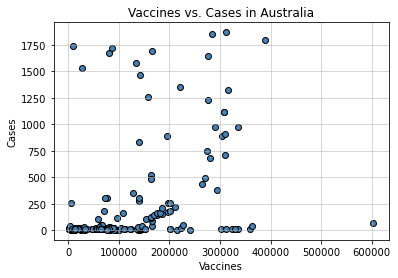

In [24]:
# Create Scatter Plot
plt.scatter(vac_case_df["Vaccinations (Aus)"], vac_case_df["Cases (Aus)"], facecolor = "steelblue", edgecolor = "black")

# Set title, labels and gridline
plt.title("Vaccines vs. Cases in Australia")
plt.xlabel("Vaccines")
plt.ylabel("Cases")
plt.grid(linewidth=1, alpha = 0.5)

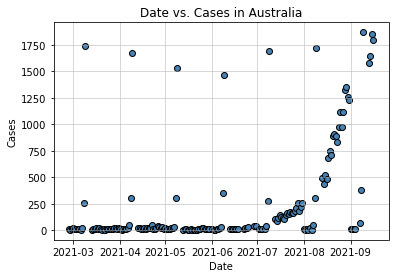

In [25]:
# Create Scatter Plot
plt.scatter(vac_case_df["date"], vac_case_df["Cases (Aus)"], facecolor = "steelblue", edgecolor = "black")

# Set title, labels and gridline
plt.title("Date vs. Cases in Australia")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.grid(linewidth=1, alpha = 0.5)

In [ ]:
# Outlier

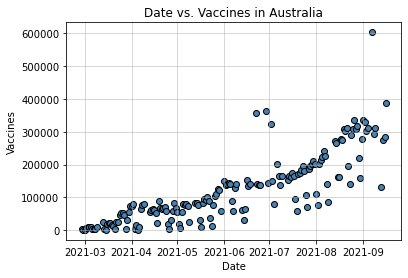

In [26]:
# Create Scatter Plot
plt.scatter(vac_case_df["date"], vac_case_df["Vaccinations (Aus)"], facecolor = "steelblue", edgecolor = "black")

# Set title, labels and gridline
plt.title("Date vs. Vaccines in Australia")
plt.xlabel("Date")
plt.ylabel("Vaccines")
plt.grid(linewidth=1, alpha = 0.5)


In [ ]:
# Group days into months and create a bar chart